In [25]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data = ("../Pyber/data/city_data.csv")
ride_data = ("../Pyber/data/ride_data.csv")

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
ride_df.head()

# Combine the data into a single dataset
city_and_ride_df = pd.merge(city_df, ride_df, on='city', how='outer')

# Display the data table for preview
city_and_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

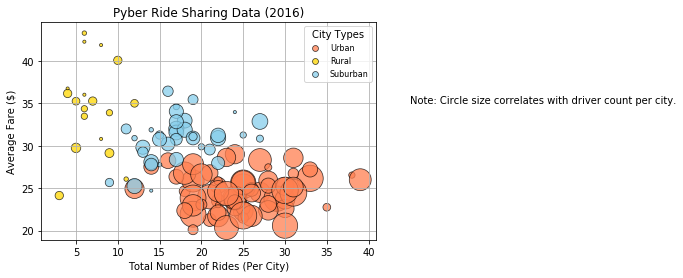

In [2]:
# Obtain the x and y coordinates for each of the three city types
urban_type = city_and_ride_df[city_and_ride_df["type"] == "Urban"].groupby([city_and_ride_df["city"]])
rural_type = city_and_ride_df[city_and_ride_df["type"] == "Rural"].groupby([city_and_ride_df["city"]])
suburban_type = city_and_ride_df[city_and_ride_df["type"] == "Suburban"].groupby([city_and_ride_df["city"]])

# Build the scatter plots for each city types
x_urban = urban_type["ride_id"].count()
y_urban = urban_type["fare"].mean()
s_urban = urban_type["driver_count"].mean()

x_rural = rural_type["ride_id"].count()
y_rural = rural_type["fare"].mean()
s_rural = rural_type["driver_count"].mean()

x_suburban = suburban_type["ride_id"].count()
y_suburban = suburban_type["fare"].mean()
s_suburban = suburban_type["driver_count"].mean()

plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], linewidths = .75, edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], linewidths = .75, edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["skyblue"], linewidths = .75, edgecolor="black", alpha = 0.75, marker="o")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best")
legend.legendHandles[0]._sizes = [35]
legend.legendHandles[1]._sizes = [35]
legend.legendHandles[2]._sizes = [35]

# Incorporate a text label regarding circle size
plt.text(45, 35,"Note: Circle size correlates with driver count per city.")

# Save Figure
plt.savefig("../Pyber/data/RideSharingData.png")

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

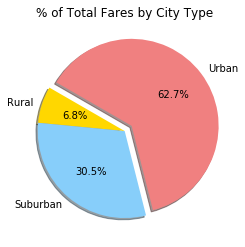

In [18]:
# Calculate Type Percents
type_groupped = city_and_ride_df.groupby(['type'])
fare_sum = type_groupped['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0,0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
#I noticed the colors changed slightly in the examples, but still stayed in the same color scheme, just a lighter shade

# Save Figure
plt.savefig("../Pyber/data/FaresbyCityType.png")


In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

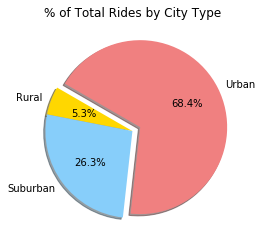

In [19]:
# Calculate Ride Percents
type_groupped = city_and_ride_df.groupby(['type'])
rides_count = type_groupped['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0,0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
#I noticed the colors changed slightly in the examples, but still stayed in the same color scheme, just a lighter shade

# Save Figure
plt.savefig("../Pyber/data/RidesbyCityType.png")


In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

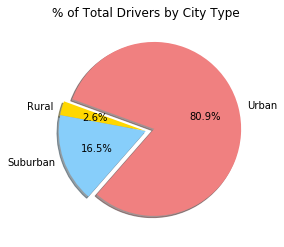

In [20]:
# Calculate Driver Percents
type_groupped = city_df.groupby(['type'])
drivers_count = type_groupped['driver_count'].sum()

# Build Pie Charts
labels = ["Rural","Suburban","Urban"]
explode = (0,0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")
#I noticed the colors changed slightly in the examples, but still stayed in the same color scheme, just a lighter shade
# I also noticed the start angle changed slithtly on this one

# Save Figure
plt.savefig("../Pyber/data/DriversbyCityType.png")


In [ ]:
# Show Figure
plt.show()